# Model and Tokenizer initialization

In [ ]:
%%capture
# !pip install transformers
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification

#============= Initialize Arabic Bert =============#
tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-base-arabic")
model = AutoModelForSequenceClassification.from_pretrained("asafaya/bert-base-arabic", num_labels=3)

# Initial Data Preperation

In [ ]:
pip install qalsadi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 4.9 MB/s 
     |████████████████████████████████| 332 kB 71.0 MB/s 
     |████████████████████████████████| 138 kB 72.8 MB/s 
     |████████████████████████████████| 126 kB 70.4 MB/s 
     |████████████████████████████████| 251 kB 52.7 MB/s 
     |████████████████████████████████| 9.2 MB 24.2 MB/s 
     |████████████████████████████████| 353 kB 67.0 MB/s 
     |████████████████████████████████| 51 kB 600 kB/s 
  Created wheel for pickledb: filename=pickleDB-0.9.2-py3-none-any.whl size=4271 sha256=45c1a605976ccd5182becaf8968464d60313a015ed22567817c3176e24f0262d
  Stored in directory: /root/.cache/pip/wheels/08/34/42/9a7f94099208ce3d32638d98586a5a50f821db2fc75a3bdaae
Successfully built pickledb


In [ ]:
%store tokenizer
%store model

Stored 'tokenizer' (BertTokenizerFast)
Stored 'model' (BertForSequenceClassification)


In [ ]:
%store -r tokenizer
%store -r model

no stored variable tokenizer
no stored variable model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# stopwords.words('arabic')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import numpy as np
import pandas as pd
import re
import qalsadi.lemmatizer
# lemmer = qalsadi.lemmatizer.Lemmatizer()
#============= Read CSV and apply data preperation =============#
directory = "D:/DEBI/Uottawa/Data Science Applications/kaggle/"

data_frame = pd.read_csv(directory+"/train.csv")
data_frame.head(10)

,tweet,class
0,' #علمتني_الحياه أن الذين يعيشون على الأرض ليس...,pos
1,' #ميري_كرسمس كل سنة وانتم طيبين http://t.co/n...,pos
2,' و انتهى مشوار الخواجة ',neg
3,' مش عارف ابتدى مذاكره منين :/ ',neg
4,' @mskhafagi إختصروا الطريق بدلا من إختيار ال...,neg
5,' إذ خانت المرأة فهي تبحث عن الإهتمام .. و إذ ...,neg
6,' يا حبيبتي البعد ناار قلبي داب من الانتظار ♡ ',pos
7,"' """"""يا سامحك الله، من علّمك أن تكون خيبة؟"""""""" '",neg
8,' خى مالها قفلت من كل حتة كده لييه ! ',neg
9,' الناس اللى حضرت حفلات البرلمان القديم ياريت ...,neg


In [ ]:
data_frame.shape

(2059, 2)

In [ ]:
def lem_stopwords_tokenize2(text):
  lemmas = lemmer.lemmatize_text(text , return_pos=True)
  stop_words = set(stopwords.words('arabic'))
  clean_words=""
  for word_tupel in lemmas:
    # print(word_tupel[1])
    if word_tupel[1] != "stopword" or (word_tupel[0] not in stop_words):
      clean_words+=word_tupel[0]+" "
  # clean_words.append('[SEP]') 
  return clean_words[:-1]

In [ ]:
def lem_stopwords_tokenize(text):
  lemmas = lemmer.lemmatize_text(text , return_pos=True)
  # stop_words = set(stopwords.words('arabic'))
  clean_words=""
  for word_tupel in lemmas:
    # print(word_tupel[1])
    # if word_tupel[1] != "stopword" or (word_tupel[0] not in stop_words):
    clean_words+=word_tupel[0]+" "
  # clean_words.append('[SEP]') 
  return clean_words[:-1]

In [ ]:
text = 'جاامد اللهم اللللله  حللو علمتني_الحياه أن الذين يعيشون على الأرض ليسوا ملائكة بل بشر قد يصيبوا وقد يخطئوا فلا يجوز أن أحكم على شخص من موقف واحد تعاملت معه فيه'
x= lem_stopwords_tokenize(text)
print(x)

جاامد اللهم اللللله حلل علمتني_الحياه أن الذين أعاش على أرض ليسوا ملائك بل بشر قد أصاب قد أخطأ لا جاز أن حكم على شخص من موقف واحد تعامل مع في


In [ ]:
# payload['text'] = "علمتني_الحياه أن الذين يعيشون على الأرض ليسوا"
# data = requests.post(url, data=payload)
# print(data.text)
# result = json.loads(data.text)
# print(result) 
tokens = tokenizer("علمتني_الحياه أن الذين يعيشون على الأرض ليسوا").tokens()
print(tokens)
t = list(filter(lambda x: "#" not in x,tokens))
t

['[CLS]', 'علمت', '##ني', '_', 'الحياه', 'ان', 'الذين', 'يعيشون', 'على', 'الارض', 'ليسوا', '[SEP]']


['[CLS]',
 'علمت',
 '_',
 'الحياه',
 'ان',
 'الذين',
 'يعيشون',
 'على',
 'الارض',
 'ليسوا',
 '[SEP]']

In [7]:
# import dataclasses
# import numpy as np
# import pandas as pd
# import re

# #============= Read CSV and apply data preperation =============#
# df = pd.read_csv("/content/drive/MyDrive/DEBI/uottawa/Ds applications/kaggle competition/train.csv")

# # clean-up: remove #tags, http links and special symbols
# 
# df.iloc[:,0] = df.iloc[:,0].apply(lambda x: re.sub(r'http\S+', '', x))
# df.iloc[:,0] = df.iloc[:,0].apply(lambda x: re.sub(r'[@|#]\S*', '', x))
# df.iloc[:,0] = df.iloc[:,0].apply(lambda x: re.sub(r'"+', '', x))

# # Remove arabic signs
# df.iloc[:,0] = df.iloc[:,0].apply(lambda x: re.sub(r'([@A-Za-z0-9_ـــــــــــــ]+)|[^\w\s]|#|http\S+', '', x))

# # Remove repeated letters like "الللللللللللللللله" to "الله"
# df.iloc[:,0] = df.iloc[:,0].apply(lambda x: x[0:2] + ''.join([x[i] for i in range(2, len(x)) if x[i]!=x[i-1] or x[i]!=x[i-2]]))

# # Tokenize the sentences using bert tokenizer
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(directory+"araBERT/araBERT_tokenizer")
general_filter = lambda x: re.sub(r'([@A-Za-z0-9ـــــــــــــ]+)|[^\w\s]|#|http\S+|[\s]{2,}', '', x)
rem_repeated_letters = lambda x: x[0:2] + ''.join([x[i] for i in range(2, len(x)) if x[i]!=x[i-1] or x[i]!=x[i-2]])
heart_emotion_translate = lambda x: re.sub(r'[♥|❤️|❤|♡]+', 'قلب', x)
happy_emotion_translate = lambda x: re.sub(r'(\^[._]?\^)+', 'سعيد', x)
sad_emotion_translate = lambda x: re.sub(r'(-[._]?-)+', 'حزين', x)

def pre_process(data_frame):
  data_frame_x = data_frame.copy()
  # data_frame_x.tweet = data_frame_x.tweet.apply(lambda x: x[2:-2]).apply(heart_emotion_translate).apply(happy_emotion_translate).apply(sad_emotion_translate).apply(general_filter).apply(rem_repeated_letters).apply(lem_stopwords_tokenize)

  data_frame_x["bert_tokens"] = data_frame_x.tweet.apply(lambda x:tokenizer(x).tokens())# list(filter(lambda x: "#" not in x, tokenizer(x).tokens())))
  return data_frame_x

c:\Users\river\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [ ]:

st = lem_stopwords_tokenize("علمتني_الحياه أعاش أرض ملائك بشر أصاب أخطأ جاز")
st

'علمتني_الحياه أعاش أرض ملاء بشر صابي خطأ جاز'

In [8]:
df = pre_process(data_frame)
df.head()

,tweet,class,bert_tokens
0,' #علمتني_الحياه أن الذين يعيشون على الأرض ليس...,pos,"[[CLS], ', #, علمتني, _, الح, ##يا, ##ه, أن, ا..."
1,' #ميري_كرسمس كل سنة وانتم طيبين http://t.co/n...,pos,"[[CLS], ', #, ميري, _, كرس, ##مس, كل, سن, ##ة,..."
2,' و انتهى مشوار الخواجة ',neg,"[[CLS], ', و, انتهى, مشوار, الخ, ##واج, ##ة, '..."
3,' مش عارف ابتدى مذاكره منين :/ ',neg,"[[CLS], ', مش, عارف, ابتد, ##ى, مذاكر, ##ه, من..."
4,' @mskhafagi إختصروا الطريق بدلا من إختيار ال...,neg,"[[CLS], ', @, m, ##sk, ##ha, ##fa, ##g, ##i, إ..."


In [ ]:
import fasttext
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/DEBI/uottawa/Ds applications/kaggle competition/train.csv")
df.iloc["fasttext"] = dataset.iloc[:, 1].apply(lambda x: '__label__' + x)
ds.iloc[:, 1] = ds.iloc[:, 1].apply(lambda x: '__label__' + x)
# Skipgram model :
model = fasttext.train_unsupervised(df.tweet, model='skipgram')

# or, cbow model :
model = fasttext.train_unsupervised(df.tweet, model='cbow')


In [9]:
from sklearn import preprocessing

bert_tokens = df["bert_tokens"]
labels = df["class"]

# Apply label encoding over the labels
le = preprocessing.LabelEncoder()
Encodedlabels =le.fit_transform(labels)

In [10]:
Encodedlabels


array([2, 2, 0, ..., 2, 0, 1])

# Padding and attention mask

In [11]:
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway. 
# In the original paper, the authors used a length of 512.
MAX_LEN = 128
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in bert_tokens]
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

ModuleNotFoundError: No module named 'keras'

In [ ]:
print(input_ids[0])
print(attention_masks[0])

[    2 11574  1857    41 22915  1732  2481  1903  2075  1747  3648 17676
  6864  2164  2000  4821  2048  7824  2048 20818  1783  7605  1732  3925
  1747  2594  1726  5199  2807 11837  1776  1725     3     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

# To tensors

In [ ]:
import tensorflow as tf
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# Use train_test_split to split our data into train and validation sets for training
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, Encodedlabels, 
                                                            random_state=2018, test_size=0.08)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.08)
# Convert all of our data into torch tensors, the required datatype for our model

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)
# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 16

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_dataloader = DataLoader(validation_data, batch_size=batch_size)

In [ ]:
for batch in train_dataloader:
  print(batch)
  break

[tensor([[    2, 24192, 27275,  ...,     0,     0,     0],
        [    2,  7153,  6058,  ...,     0,     0,     0],
        [    2,    41,  1882,  ...,     0,     0,     0],
        ...,
        [    2,  3947,  7881,  ...,     0,     0,     0],
        [    2,  1882,  2091,  ...,     0,     0,     0],
        [    2,  2300, 14684,  ...,     0,     0,     0]]), tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.]]), tensor([0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0])]


# Set optimizer parameters

In [ ]:
import torch.optim as optim

param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [{'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],'weight_decay_rate': 0.01},
                                {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],'weight_decay_rate': 0.0}]
# This variable contains all of the hyperparemeter information our training loop needs
#optimizer = BertAdam(optimizer_grouped_parameters,lr=2e-5,warmup=.1)
optimizer = optim.AdamW(optimizer_grouped_parameters,lr=2e-5)

In [ ]:
# loss = model(train_data[:1][0], attention_mask=train_data[:1][1], labels=train_data[:1][2])
# loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
# loss

# Training

In [ ]:
from tqdm import tqdm, trange
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
t = []
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs 
epochs = 10

# Transfer the model to GPU
model.to(device)

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):
  
  
  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()
  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    b_input_ids, b_input_mask, b_labels = batch

    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()

    # Forward pass
    loss = model(b_input_ids.to(device), token_type_ids=None, attention_mask=b_input_mask.to(device), labels=b_labels.to(device))["loss"]
    train_loss_set.append(loss.item())

    # Backward pass
    loss.backward()
    
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    
    
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    # batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids.to(device), token_type_ids=None, attention_mask=b_input_mask.to(device))
    
    # Move logits and labels to CPU
    logits = logits["logits"].detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))
  

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Train loss: 0.9255277509448909


Epoch:  10%|█         | 1/10 [00:38<05:45, 38.44s/it]

Validation Accuracy: 0.5886363636363636
Train loss: 0.6446525204081496


Epoch:  20%|██        | 2/10 [01:18<05:13, 39.17s/it]

Validation Accuracy: 0.5897727272727272
Train loss: 0.3770290895545182


Epoch:  30%|███       | 3/10 [01:58<04:36, 39.55s/it]

Validation Accuracy: 0.6
Train loss: 0.17622454678874558


Epoch:  40%|████      | 4/10 [02:37<03:57, 39.59s/it]

Validation Accuracy: 0.6113636363636363
Train loss: 0.08925188246707455


Epoch:  50%|█████     | 5/10 [03:17<03:18, 39.66s/it]

Validation Accuracy: 0.6522727272727272
Train loss: 0.059494208344923596


Epoch:  60%|██████    | 6/10 [03:57<02:38, 39.68s/it]

Validation Accuracy: 0.5590909090909091
Train loss: 0.04492107264016669


Epoch:  70%|███████   | 7/10 [04:37<01:59, 39.70s/it]

Validation Accuracy: 0.5420454545454546
Train loss: 0.044588652424741256


Epoch:  80%|████████  | 8/10 [05:16<01:19, 39.70s/it]

Validation Accuracy: 0.5659090909090909
Train loss: 0.03833077619724883


Epoch:  90%|█████████ | 9/10 [05:56<00:39, 39.69s/it]

Validation Accuracy: 0.5704545454545454
Train loss: 0.0434560219810086


Epoch: 100%|██████████| 10/10 [06:36<00:00, 39.61s/it]

Validation Accuracy: 0.5954545454545455


# Apply predicition over the submission dataset

In [ ]:

#============= Read CSV and apply data preperation =============#
df_submit = pd.read_csv("/content/drive/MyDrive/DEBI/uottawa/Ds applications/kaggle competition/test.csv")

# clean-up: remove #tags, http links and special symbols
df_submit.tweet = df_submit.tweet.apply(lambda x: x[2:-2])
df_submit.tweet = df_submit.tweet.apply(lambda x: re.sub(r'http\S+', '', x))
df_submit.tweet = df_submit.tweet.apply(lambda x: re.sub(r'[@|#]\S*', '', x))
df_submit.tweet = df_submit.tweet.apply(lambda x: re.sub(r'"+', '', x))

# Remove arabic signs
df_submit.tweet = df_submit.tweet.apply(lambda x: re.sub(r'([@A-Za-z0-9_ـــــــــــــ]+)|[^\w\s]|#|http\S+', '', x))

# Remove repeated letters like "الللللللللللللللله" to "الله"
df_submit.tweet = df_submit.tweet.apply(lambda x: x[0:2] + ''.join([x[i] for i in range(2, len(x)) if x[i]!=x[i-1] or x[i]!=x[i-2]]))

# Tokenize the sentences using bert tokenizer
df_submit["bert_tokens"] = df_submit.tweet.apply(lambda x: tokenizer(x).tokens())

In [ ]:
df_submit = pd.read_csv("/content/drive/MyDrive/DEBI/uottawa/Ds applications/kaggle competition/test.csv")

df_submit.tweet = df_submit.tweet.apply(lambda x: x[2:-2]).apply(heart_emotion_translate).apply(happy_emotion_translate).apply(sad_emotion_translate).apply(general_filter).apply(rem_repeated_letters).apply(lem_stopwords_tokenize)

df_submit["bert_tokens"] = df_submit.tweet.apply(lambda x:tokenizer(x).tokens())# list(filter(lambda x: "#" not in x, tokenizer(x).tokens())))


In [ ]:
# df_submit["bert_tokens"] = pre_process(df_submit)
df_submit.head()
bert_tokens_submit = df_submit["bert_tokens"]

In [ ]:
# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway. 
# In the original paper, the authors used a length of 512.
MAX_LEN = 128
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids_submit = [tokenizer.convert_tokens_to_ids(x) for x in bert_tokens_submit]
# Pad our input tokens
input_ids_submit = pad_sequences(input_ids_submit, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks_submit = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids_submit:
  seq_mask = [float(i>0) for i in seq]
  attention_masks_submit.append(seq_mask)

In [ ]:
# Convert all of our data into torch tensors, the required datatype for our model
inputs_submit = torch.tensor(input_ids_submit)
masks_submit = torch.tensor(attention_masks_submit)

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory
batch_size = 16
submit_data = TensorDataset(inputs_submit, masks_submit)

# do not use shuffle, we need the preds to be in same order
submit_dataloader = DataLoader(submit_data, batch_size=batch_size)#, shuffle=True)

In [ ]:
# input, masks = next(iter(submit_dataloader))
# out = model(input, attention_mask=masks)["logits"]

# pred_flat = np.argmax(out.detach().numpy(), axis=1).flatten()
# le.inverse_transform(pred_flat)

In [ ]:
# Put the model in an evaluation state
model.eval()

# Transfer model to GPU
model.to(device)

outputs = []
for input, masks in submit_dataloader:
  torch.cuda.empty_cache() # empty the gpu memory

  # Transfer the batch to gpu
  input = input.to(device)
  masks = masks.to(device)

  # Run inference on the batch
  output = model(input, attention_mask=masks)["logits"]

  # Transfer the output to CPU again and convert to numpy
  output = output.cpu().detach().numpy()

  # Store the output in a list
  outputs.append(output)

# Concatenate all the lists within the list into one list
outputs = [x for y in outputs for x in y]

# Inverse transform the label encoding
pred_flat = np.argmax(outputs, axis=1).flatten()
output_labels = le.inverse_transform(pred_flat)

In [ ]:
submission = pd.DataFrame({"Id":np.arange(1, len(output_labels)+1), "class":output_labels})
# save (submission)
submission.to_csv("/content/drive/MyDrive/DEBI/uottawa/Ds applications/kaggle competition/submission3.csv", index=False)

# Use last hidden state as input to an ML model

In [ ]:
model.cpu()
BERT = []
for i in range(len(train_data)):
  out = model.forward(train_data[i:i+1][0], attention_mask=train_data[i:i+1][1], output_hidden_states=True)
  Sentence_Embedding = out['hidden_states'][-1][0][0].detach().numpy()
  BERT.append(Sentence_Embedding)
# print(out.keys())
# print(out['hidden_states'][-1].shape)

# Use the vector representation of [CLS] token as the sentence embedding
# Sentence_Embedding = out['hidden_states'][-1][0][0].detach().numpy()
# Sentence_Embedding.shape

In [ ]:
%store BERT

Stored 'BERT' (list)


In [ ]:
bert = pd.Series(BERT)
d = {'BERT': bert, 'class': train_data[:][2]}
classification_df = pd.DataFrame(data = d)
classification_df

,BERT,class
0,"[-0.12731451, -0.49048722, 0.8446229, 0.259153...",2
1,"[-0.007940845, -0.35844922, 0.64526886, 1.4159...",0
2,"[-0.14694825, -0.15108207, 0.61844623, 0.22090...",2
3,"[-0.39919105, -0.77086115, 0.91552955, 0.41431...",0
4,"[0.37260002, -0.15834673, 0.7876212, 1.0688679...",0
...,...,...
1889,"[-0.08940428, -0.048215955, 0.54252553, 0.1527...",2
1890,"[-0.09964228, 0.2793295, -1.509599, -0.6494946...",1
1891,"[1.6351423, -1.1040494, -0.9031536, -2.797814,...",1
1892,"[0.4533549, 0.007047168, -1.6182576, -0.951273...",1


In [ ]:
classification_df.to_csv("/content/drive/MyDrive/DEBI/uottawa/Ds applications/kaggle competition/classification_df.csv")

In [ ]:
%store model

Stored 'model' (BertForSequenceClassification)


In [ ]:
model.cpu()
BERT_validation = []

for i in range(len(validation_data)):
  out = model.forward(validation_data[i:i+1][0], attention_mask=validation_data[i:i+1][1], output_hidden_states=True)
  Sentence_Embedding = out['hidden_states'][-1][0][0].detach().numpy()
  BERT_validation.append(Sentence_Embedding)
# BERT.append(Sentence_Embedding)
# print(out.keys())
# print(out['hidden_states'][-1].shape)

# Use the vector representation of [CLS] token as the sentence embedding
# Sentence_Embedding = out['hidden_states'][-1][0][0].detach().numpy()
# Sentence_Embedding.shape

In [ ]:
bert = pd.Series(BERT_validation)
d = {'BERT': bert, 'class': validation_data[:][2]}
classification_test_df = pd.DataFrame(data = d)
classification_test_df

,BERT,class
0,"[-0.28990933, -0.48097312, 0.13375153, 0.06122...",0
1,"[0.7880645, -0.9040965, 0.42353922, 0.14112216...",2
2,"[1.2053293, -0.48301965, -0.6003597, -0.741756...",1
3,"[-0.037450455, -1.1154842, 1.168601, 0.6066721...",0
4,"[0.6025331, -0.08868365, 0.49975565, -0.498329...",1
...,...,...
160,"[0.39436767, -0.42208368, 0.99308145, 0.597421...",2
161,"[-0.5526609, -0.7062738, 0.6757368, 0.13619643...",0
162,"[-0.43905485, -0.8510437, 1.0037291, 1.2826824...",0
163,"[0.3026767, -1.1887829, 1.0611136, -0.8916653,...",1


In [ ]:
classification_test_df.to_csv("/content/drive/MyDrive/DEBI/uottawa/Ds applications/kaggle competition/classification_test_df.csv")


In [ ]:
import seaborn as sns
# from pylab import rcParams
import matplotlib.pyplot as plt

In [ ]:
def confusion_matrix_binary_classes(y_test,y_pred):
  print(confusion_matrix(y_test, y_pred))
  ax = sns.heatmap(confusion_matrix(y_test,y_pred ), annot=True, cmap='PuBuGn')
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('SVM Confusion Matrix', fontsize=18)
  plt.show()
  print(classification_report(y_test,y_pred))

In [ ]:
import itertools
def add_padding(X):
  return np.array(list(zip(*itertools.zip_longest(*X , fillvalue=0))))

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
X_train= add_padding(classification_df["BERT"].to_numpy())
y_train= classification_df["class"].to_numpy()
X_test = add_padding(classification_test_df["BERT"].to_numpy())
y_test = classification_test_df["class"].to_numpy()

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred  = clf.predict(X_train)
accuracy_score(y_train,y_pred)

1.0

In [ ]:
y_pred  = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.5757575757575758

[[35 12 11]
 [22 21 12]
 [ 2 11 39]]


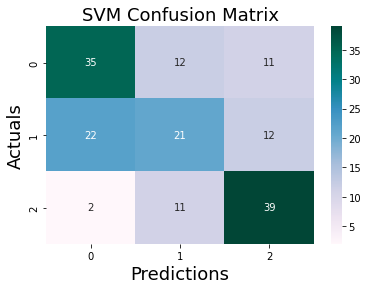

              precision    recall  f1-score   support

           0       0.59      0.60      0.60        58
           1       0.48      0.38      0.42        55
           2       0.63      0.75      0.68        52

    accuracy                           0.58       165
   macro avg       0.57      0.58      0.57       165
weighted avg       0.57      0.58      0.57       165



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix_binary_classes(y_test,y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
def plot_cv_indices(clf, X, y,param_name,parameter_range,  cv=10,model_name ="SVM"):
 
  train_score, test_score = validation_curve(clf, X, y,
                                       param_name = param_name,
                                       param_range = parameter_range,
                                        cv = cv, scoring = "accuracy",n_jobs=2)
 
# Calculating mean and standard deviation of training score
  mean_train_score = np.mean(train_score, axis = 1)
  std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
  mean_test_score = np.mean(test_score, axis = 1)
  std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
  plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
  plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
  plt.title(f"Validation Curve with {model_name} Classifier")
  plt.xlabel(f"Value of {param_name}")
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.legend(loc = 'best')
  plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

def plot_cross_val_scores(scores):
  plt.bar(range(1,len(scores)+1,1) , scores, width=0.5)
  

  plt.title("The score for each train-and-validation run")
  plt.xlabel("train-and-validation run")
  plt.ylabel("Score")
  plt.show()

def mesure_cross_vall(clf, X_train, y_train, cv=10):
  scores = cross_val_score(clf, X_train, y_train, cv=cv)
  print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
  print("K-fold cross validation score: fo each ",scores)
  return scores

def evaluate_bias_variance(clf, X_train, y_train, X_test, y_test):
  avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',random_seed=123)
  print('Average expected loss: %.3f' % avg_expected_loss)
  print('Av erage bias: %.3f' % avg_bias)
  print('Average variance: %.3f' % avg_var)

def model_evaluation(clf, X_train, y_train,cv=10):
  scores = mesure_cross_vall(clf, X_train, y_train, cv)
  #plot_cross_val_scores(scores)
  # evaluate_bias_variance(clf, X_train, y_train, X_test, y_test)

Accuracy: 1.00 (+/- 0.00)
K-fold cross validation score: fo each  [1. 1. 1. 1. 1.]


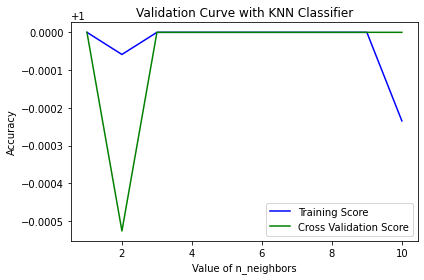

In [ ]:
clfbknn = KNeighborsClassifier(n_neighbors=4)
model_evaluation(clfbknn, X_train, y_train, cv=5)
param_range = np.arange(1, 11, 1)
plot_cv_indices(clfbknn, X_train, y_train ,"n_neighbors", param_range ,  cv=10 ,model_name = "KNN")

In [ ]:
clfbknn.fit(X_train, y_train)
y_pred  = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.5757575757575758

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred  = gnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.5818181818181818

In [ ]:
d_test = pd.read_csv("/content/drive/MyDrive/DEBI/uottawa/Ds applications/kaggle competition/test.csv")
d_test

,Id,tweet
0,1,' فينو الاهبل ابن الاهبل '
1,2,' على المصرييييين وجمالهم ربنا يحميهم #MinaAtt...
2,3,' @Kholoudkewan دول كتير اوى ودمهم خفيف العما...
3,4,' انا بعد كده خلى اللى يوعنى بحاجه همضى على...
4,5,' انا هنتحر '
...,...,...
682,683,' كاستيلو المنتزه بقا خره نيك '
683,684,' @badorh666 اهم شئ ...الطاعة ..... '
684,685,' ايووووووووه بقى يا مينوووو وحشتنااااا #مينا_...
685,686,' العشرى جون #الزمالك الاول جول واحمد الله لان...


In [ ]:
model.cpu()
BERT_test = []

for i in range(len(submit_data)):
  out = model.forward(submit_data[i:i+1][0], attention_mask=submit_data[i:i+1][1], output_hidden_states=True)
  Sentence_Embedding = out['hidden_states'][-1][0][0].detach().numpy()
  BERT_test.append(Sentence_Embedding)

In [ ]:
y_pred_final  = gnb.predict(add_padding(np.array(BERT_test)))

In [ ]:
submission = pd.DataFrame({"Id":np.arange(1, len(y_pred_final)+1), "class":y_pred_final})
# save (submission)
submission.to_csv("/content/drive/MyDrive/DEBI/uottawa/Ds applications/kaggle competition/submission4.csv", index=False)

In [ ]:
from tqdm import tqdm, trange
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
t = []

# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs 
epochs = 5

# Transfer the model to GPU
model.to("cuda")

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):
  
  
  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()
  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    b_input_ids, b_input_mask, b_labels = batch

    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()

    # Forward pass
    loss = model(b_input_ids.to("cuda"), token_type_ids=None, attention_mask=b_input_mask.to("cuda"), labels=b_labels.to("cuda"))["loss"]
    train_loss_set.append(loss.item())

    # Backward pass
    loss.backward()
    
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    
    
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    # batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids.to("cuda"), token_type_ids=None, attention_mask=b_input_mask.to("cuda"))
    
    # Move logits and labels to CPU
    logits = logits["logits"].detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))
  

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Train loss: 0.9377410298791425


Epoch:  20%|██        | 1/5 [01:21<05:27, 81.89s/it]

Validation Accuracy: 0.6229395604395604
Train loss: 0.6494704225453837


Epoch:  40%|████      | 2/5 [02:47<04:12, 84.33s/it]

Validation Accuracy: 0.6092032967032966
Train loss: 0.3438927285887044


Epoch:  60%|██████    | 3/5 [04:14<02:50, 85.32s/it]

Validation Accuracy: 0.5947802197802198
Train loss: 0.1745320632411488


Epoch:  80%|████████  | 4/5 [05:40<01:25, 85.71s/it]

Validation Accuracy: 0.5995879120879121
